# Practicals for lecture 1.1 - Part2

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec/blob/main/practicals/Practicals_1.1-Part2.ipynb)

## More on `numpy`

In [2]:
from matplotlib import pyplot as plt
import numpy as np

#### 1.1.1 Vectorizations and indexing

In [6]:
import requests
import json

def download_meteo_data(start_date="2022-01-01", end_date="2022-12-31",
                        latitude="45.88204", longitude="11.03647",
                        data="temperature_2m"):
    """Download meteo historical data from open-meteo.com.
    
    Parameters
    ----------
        start_date : str
            Beginning of time series.
            
        end_date : str
            End of time series.
            
        latitude : float
            Latitude of the time series.
            
        longitude : float
            Longitude of the time series.
            
        data : str
            Data to download. One of "temperature_2m", "relativehumidity_2m",
            "precipitation", "snowfall", "windspeed_10m".
            
    Returns
    -------
        np.array
            1D array of timestamps
        np.array
            1D array of data, sampled every hour (24 points per day)

    """
    BASE_URL = "https://archive-api.open-meteo.com/v1/"
    query = f"archive?latitude={latitude}&longitude={longitude}&start_date={start_date}&end_date={end_date}&hourly={data}"

    r = requests.get(BASE_URL + query)
    json_dict = json.loads(r.text)
    
    if "hourly" not in json_dict.keys():
        print(json_dict)
        return None, None
    else:
        return (np.array(json_dict["hourly"][k]) for k in ["time", data])


tststamps_array, temp_array = download_meteo_data()
# Reshape the array to be a matrix of shape (n_days, n_hours). 
n_days = 365
n_hours = 24

temp_matrix = np.reshape(temp_array, (n_days, n_hours))
temp_matrix

array([[3.3, 3.4, 2.6, ..., 7.9, 6.5, 5.5],
       [5. , 3.5, 3.3, ..., 6.6, 6.3, 6. ],
       [5.6, 5.4, 5.2, ..., 4.9, 4.8, 4.7],
       ...,
       [6.7, 6.8, 6.5, ..., 7.9, 7.9, 7.9],
       [7.9, 8. , 8. , ..., 9.4, 9.1, 8.8],
       [8.4, 6.8, 6.2, ..., 6.4, 6.1, 6. ]])

In [9]:
# Let's have a look at daily excursions instead of absolute temperatures!

# Write a function that takes as input a matrix and subtracts from each row 
# the minimum value of that row, in a loop. 
# Make sure you do not change the original matrix when running the function!

def subtract_min(array):
    array = array.copy()
    
    for idx_row in range(array.shape[0]):
        array[idx_row, :] = array[idx_row, :] - np.min(array[idx_row, :])
        
    return array

subtract_min(temp_matrix)

array([[1.2, 1.3, 0.5, ..., 5.8, 4.4, 3.4],
       [3.6, 2.1, 1.9, ..., 5.2, 4.9, 4.6],
       [2.3, 2.1, 1.9, ..., 1.6, 1.5, 1.4],
       ...,
       [1. , 1.1, 0.8, ..., 2.2, 2.2, 2.2],
       [0. , 0.1, 0.1, ..., 1.5, 1.2, 0.9],
       [4.5, 2.9, 2.3, ..., 2.5, 2.2, 2.1]])

In [13]:
temp_matrix.shape

(365, 24)

(365, 1)

In [26]:
# Now, write a second function that does the same in a single vector operation:
def subtract_min_vectorial(array):
    return array - np.min(temp_matrix, axis=1)[:, np.newaxis]
subtract_min_vectorial(temp_matrix)

array([[1.2, 1.3, 0.5, ..., 5.8, 4.4, 3.4],
       [3.6, 2.1, 1.9, ..., 5.2, 4.9, 4.6],
       [2.3, 2.1, 1.9, ..., 1.6, 1.5, 1.4],
       ...,
       [1. , 1.1, 0.8, ..., 2.2, 2.2, 2.2],
       [0. , 0.1, 0.1, ..., 1.5, 1.2, 0.9],
       [4.5, 2.9, 2.3, ..., 2.5, 2.2, 2.1]])

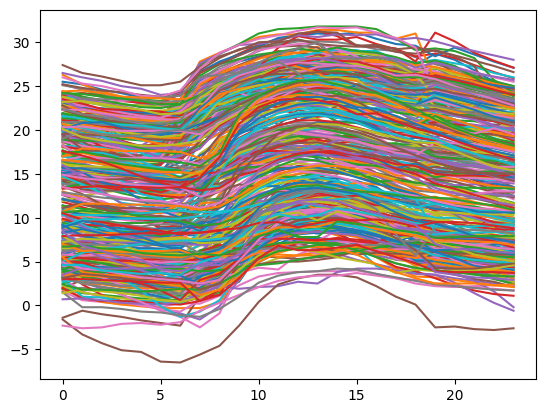

In [29]:
# Then, test it over the temperature data matrix. Use plt.matshow to visualize it before and after
# the offset subtraction:
plt.plot(temp_matrix.T)
plt.show()

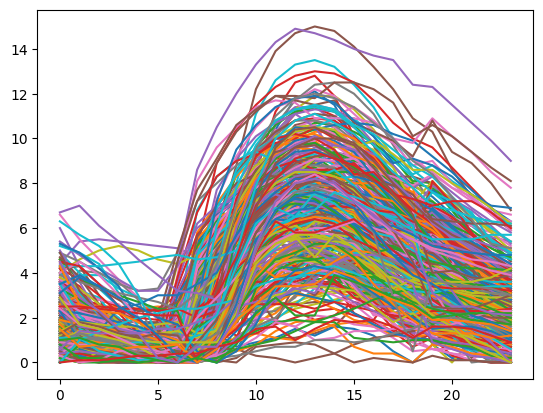

In [30]:
normalized = subtract_min_vectorial(temp_matrix)
plt.plot(normalized.T)
plt.show()

In [34]:
# use np.argmax over temp_matrix to find the index of the warmest hour of 2022.
# Then, unravel the index to know which day and which hour of the day it was!
peak_idx = np.argmax(temp_matrix)
np.unravel_index(peak_idx, temp_matrix.shape)

(202, 13)

In [45]:
# We can use the index we find over one array to index a different array.

# Use argmax to find the index of the warmest hour in the (non-reshaped) temp_array.
# Then, use the index over tststamps_array to read out the corresponding timestamp.
# check that it matches your result from the previous exercise!


peak_idx =np.argmax(temp_array)
tststamps_array[peak_idx]

'2022-07-22T13:00'

In [43]:
# (Optional: we did not do this in class!)
# We can use the np.argsort() function to produce the indexes array required to
# order an array in ascending or descending values.

# For example:
random_arr = np.array([0.1, 5, 3.4, 2.3])
ordering_idxs = np.argsort(random_arr)
random_arr[ordering_idxs]  # with this index, this is now ordered!

array([0.1, 2.3, 3.4, 5. ])

In [50]:
# Let's make a ranking of the 5 warmest hours of 2022! 
# Sort the (non-reshaped) temperature array using the indexes produced by np.argsort.
# so that the first elements are the highest temperatures.
# Then sort the imestamps array with the same indexes, and take the first 5.
#
# Double check you match the result that you have got in the exercises above!


# To have the highest temperatures first, we have to sort the negative of the temperature:
# the sorting produces an increasing distribution, and sorting the original array highest temps will be at the end.
sorting_idxs =np.argsort(-temp_array)

print("Sorted temperatures:")
print(temp_array[sorting_idxs[:5]])

print("Sorted timestamps:")
print(tststamps_array[sorting_idxs[:5]])


Sorted temperatures:
[31.8 31.8 31.8 31.7 31.7]
Sorted timestamps:
['2022-07-22T15:00' '2022-07-22T14:00' '2022-07-22T13:00'
 '2022-08-05T15:00' '2022-08-05T13:00']
